# Interactions

This is a collection of interactions, mostly from the book. If you have are reading a print version of the book, or are reading it online via Github or nbviewer you will be unable to run the interactions.

So I have created this notebook. Here is how you run an interaction if you do not have IPython installed on your computer.

1. Go to try.juptyer.org in your browser. It will launch a temporary notebook server for you.

2. Click the **New** button and select `Python 3`. This will create a new notebook that will run Python 3 for you in your browser.

3. Copy the entire contents of a cell from this notebook and paste it into a 'code' cell in the notebook on your browser. 

4. Press CTRL+ENTER to execute the cell.

5. Have fun! Change code. Play. Experiment. Hack.

Your server and notebook is not permanently saved. Once you close the session your data is lost. Yes, it says it is saving your file if you press save, and you can see it in the directory. But that is just happening in a Docker container that will be deleted as soon as you close the window. Copy and paste any changes you want to keep to an external file.

Of course if you have IPython installed you can download this notebook and run it on your own computer. Type

    ipython notebook
    
in a command prompt from the directory where you downloaded this file. Click on the name of this file to open it.

# Experimenting with FPF'


The Kaman filter uses the equation $x^- = FPF^\mathsf{T}$.

**blah**

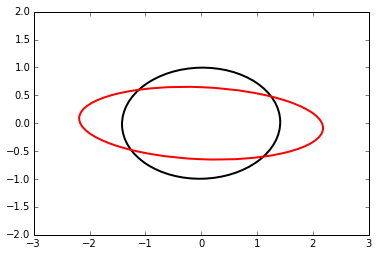

In [1]:
%matplotlib inline
from IPython.html.widgets import interact, interactive, fixed
import IPython.html.widgets as widgets
import numpy as np
import numpy.linalg as linalg
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_covariance_ellipse(x, P, edgecolor='k', ls='solid'):
    U,s,v = linalg.svd(P)
    angle = math.atan2(U[1,0],U[0,0])
    width  = math.sqrt(s[0]) * 2
    height = math.sqrt(s[1]) * 2

    ax = plt.gca()
    e = Ellipse(xy=(0, 0), width=width, height=height, angle=angle,
                edgecolor=edgecolor, facecolor='none',
                lw=2, ls=ls)
    ax.add_patch(e)
    
    
def plot_FPFT(F00, F01, F10, F11, covar):
    
    dt = 1.
    x = np.array((0, 0.))
    P = np.array(((1, covar), (covar, 2)))
    F = np.array(((F00, F01), (F10, F11)))

    plot_covariance_ellipse(x, P)
    plot_covariance_ellipse(x, np.dot(F, P).dot(F.T), edgecolor='r')
    plt.axis('equal')
                 
interact(plot_FPFT, 
         F00=widgets.IntSliderWidget(value=1, min=0, max=2.), 
         F01=widgets.FloatSliderWidget(value=1, min=0., max=2., description='F01(dt)'),
         F10=widgets.FloatSliderWidget(value=0, min=0., max=2.),
         F11=widgets.FloatSliderWidget(value=1, min=0., max=2.),
         covar=widgets.FloatSliderWidget(value=0, min=0, max=1.));